# Курсовой проект для курса "Python для Data Science"
### Задание:
Используя данные из обучающего датасета (train.csv), построить модель для предсказания цен на недвижимость (квартиры). С помощью полученной модели, предсказать цены для квартир из тестового датасета (test.csv).

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import KFold, GridSearchCV

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [56]:
# читаю данные
df_train = pd.read_csv('train.csv')
df_test  = pd.read_csv('test.csv')

# индексы из значений id
df_train.set_index('Id', inplace=True)
df_test.set_index('Id', inplace=True)

## Оцениваю данные

In [57]:
df_train.describe()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.000000,10000.000000,10000.000000,7887.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,5202.000000,10000.000000,10000.000000,10000.000000
mean,50.400800,1.890500,56.315775,37.199645,6.273300,8.526700,12.609400,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,1142.904460,1.319500,4.231300,214138.857399
std,43.587592,0.839512,21.058732,86.241209,28.560917,5.241148,6.775974,2.005003e+05,0.119025,17.532614,4006.799803,23.831875,1021.517264,1.493601,4.806341,92872.293865
min,0.000000,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,20.000000,1.000000,41.774881,22.769832,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,153872.633942
50%,36.000000,2.000000,52.513310,32.781260,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192269.644879
75%,75.000000,2.000000,65.900625,45.128803,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,249135.462171
max,209.000000,19.000000,641.065193,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570


In [58]:
df_test.describe()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1
count,5000.000000,5000.000000,5000.000000,3959.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,2623.000000,5000.00000,5000.000000
mean,51.279200,1.910000,56.449500,36.158810,5.976800,8.632000,12.601000,1984.392600,0.119874,24.933800,5406.900000,8.262600,1146.657263,1.31940,4.242800
std,44.179466,0.838594,19.092787,17.825287,9.950018,5.483228,6.789213,18.573149,0.120070,17.532202,4026.614773,23.863762,1044.744231,1.47994,4.777365
min,0.000000,0.000000,1.378543,0.333490,0.000000,1.000000,0.000000,1908.000000,0.000000,0.000000,168.000000,0.000000,0.000000,0.00000,0.000000
25%,21.000000,1.000000,41.906231,23.092026,1.000000,4.000000,9.000000,1973.000000,0.019509,6.000000,1564.000000,0.000000,325.000000,0.00000,1.000000
50%,37.000000,2.000000,52.921340,32.925087,6.000000,7.000000,12.000000,1977.000000,0.072158,25.000000,5285.000000,2.000000,900.000000,1.00000,3.000000
75%,77.000000,2.000000,66.285129,45.174091,9.000000,12.000000,17.000000,2000.000000,0.195781,36.000000,7287.000000,5.000000,1548.000000,2.00000,6.000000
max,212.000000,17.000000,223.453689,303.071094,620.000000,78.000000,99.000000,2020.000000,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.00000,23.000000


KeyError: 'Id'

In [118]:
df_test.head(10)


KeyError: 'Id'

1. Заметил, что максимальная Площадь квартиры меньше кухни и жилой площади.
2. DistrictId имеет цифры, а нужны строки.
3. Есть буквенные значения у Ecology_2, Ecology_3 и у Shops_2.

In [61]:
df_train['DistrictId'] = df_train['DistrictId'].astype(str)
df_test['DistrictId'] = df_test['DistrictId'].astype(str)

In [62]:
not_good_features = ['Ecology_2',  'Ecology_3', 'Shops_2']

df_train[not_good_features] = df_train[not_good_features].replace({'A':0, 'B':1})
df_test[not_good_features] = df_test[not_good_features].replace({'A':0, 'B':1})

  ### Обработаю пропуски

In [63]:
df_train.isna().sum()

DistrictId          0
Rooms               0
Square              0
LifeSquare       2113
KitchenSquare       0
Floor               0
HouseFloor          0
HouseYear           0
Ecology_1           0
Ecology_2           0
Ecology_3           0
Social_1            0
Social_2            0
Social_3            0
Healthcare_1     4798
Helthcare_2         0
Shops_1             0
Shops_2             0
Price               0
dtype: int64

In [64]:
df_train.loc[df_train['LifeSquare'].isna(), 'LifeSquare'] = df_train['Square'] - df_train['KitchenSquare']
df_test.loc[df_test['LifeSquare'].isna(), 'LifeSquare'] = df_test['Square'] - df_test['KitchenSquare']

In [65]:
df_train.loc[df_train['Healthcare_1'].isna(), 'Healthcare_1'] = df_train['Healthcare_1'].median()
df_test.loc[df_test['Healthcare_1'].isna(), 'Healthcare_1'] = df_test['Healthcare_1'].median()

### Обработаю выбрасы

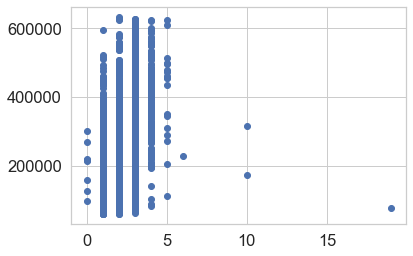

In [66]:
plt.scatter(df_train['Rooms'], df_train['Price']);

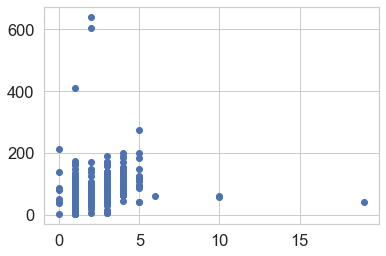

In [67]:
plt.scatter(df_train['Rooms'], df_train['Square']);

In [68]:
df_train.loc[(df_train['Rooms'] > 5)|(df_train['Rooms'] == 0), 'Rooms'] = df_train['Rooms'].mode()[0]

In [69]:
df_train.loc[(df_train['Rooms'] > 5)|(df_train['Rooms'] == 0), 'Rooms'] = df_train['Rooms'].mode()[0]
df_test.loc[(df_test['Rooms'] > 5)|(df_test['Rooms'] == 0), 'Rooms'] = df_test['Rooms'].mode()[0] 

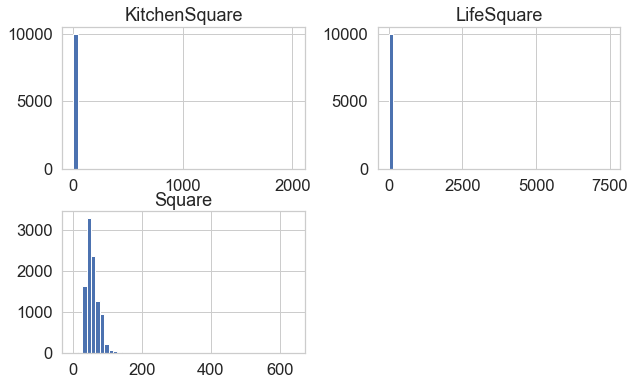

In [70]:
df_train[['Square', 'LifeSquare', 'KitchenSquare']].hist(figsize=(10,6), bins=50, grid=True);


In [71]:
df_train[['Square', 'LifeSquare', 'KitchenSquare']].describe()

,Square,LifeSquare,KitchenSquare
count,10000.000000,10000.000000,10000.000000
mean,56.315775,41.799474,6.273300
std,21.058732,77.823543,28.560917
min,1.136859,0.370619,0.000000
25%,41.774881,25.494155,1.000000
50%,52.513310,37.040829,6.000000
75%,65.900625,49.823229,9.000000
max,641.065193,7480.592129,2014.000000


In [72]:
df_train.loc[(df_train['KitchenSquare'] > 150) | \
             (df_train['KitchenSquare'] > df_train['Square']), 'KitchenSquare'] = df_train['KitchenSquare'].median()

df_test.loc[(df_test['KitchenSquare'] > 150) | \
            (df_test['KitchenSquare'] > df_test['Square']), 'KitchenSquare'] = df_test['KitchenSquare'].median()

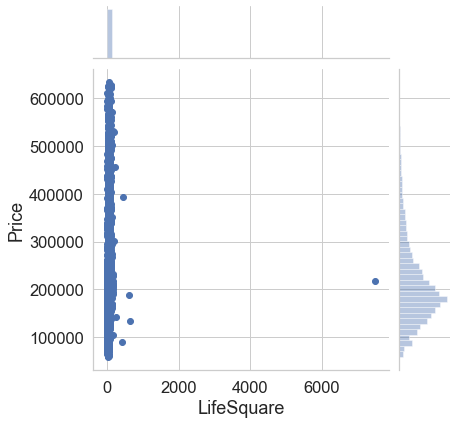

In [73]:
sns.jointplot(df_train['LifeSquare'], df_train['Price'], kind='scatter', height=6);

In [74]:
df_train.loc[(df_train['LifeSquare'] > 400), 'LifeSquare'] = \
        df_train['LifeSquare'].median()

df_test.loc[(df_test['LifeSquare'] > 400), 'LifeSquare'] = \
        df_test['LifeSquare'].median()

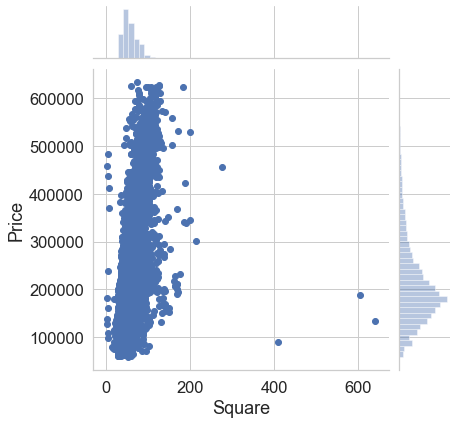

In [75]:
sns.jointplot(df_train['Square'], df_train['Price'], kind='scatter', height=6);

In [76]:
df_train.loc[(df_train['Square'] > 400) | (df_train['Square'] < 6), 'Square'] = \
            df_train['Square'].median()

df_test.loc[(df_test['Square'] > 400) | (df_test['Square'] < 6), 'Square'] = \
            df_test['Square'].median()

In [77]:
len(df_train[(df_train['Square'] < df_train['LifeSquare'] + df_train['KitchenSquare'])])

830

In [78]:
df_train.loc[(df_train['Square'] < df_train['LifeSquare'] + df_train['KitchenSquare']), 'Square'] = \
    df_train['LifeSquare'] + df_train['KitchenSquare']

df_test.loc[(df_test['Square'] < df_test['LifeSquare'] + df_test['KitchenSquare']), 'Square'] = \
    df_test['LifeSquare'] + df_test['KitchenSquare']

In [79]:
df_train[['Square', 'LifeSquare', 'KitchenSquare']].describe()

,Square,LifeSquare,KitchenSquare
count,10000.000000,10000.000000,10000.000000
mean,56.777478,40.858538,5.861600
std,19.748446,20.570557,5.070426
min,16.117154,0.370619,0.000000
25%,42.123347,25.494155,1.000000
50%,52.951740,37.039625,6.000000
75%,66.332122,49.771534,9.000000
max,275.645284,263.542020,123.000000


### HouseFloor, Floor

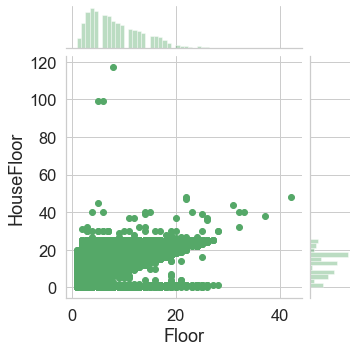

In [80]:
sns.jointplot(df_train['Floor'], df_train['HouseFloor'], kind='scatter', height=5, color='g');

In [81]:
df_train.loc[df_train['HouseFloor'] == 0, 'HouseFloor'] = df_train['HouseFloor'].mode()[0]
df_test.loc[df_test['HouseFloor'] == 0, 'HouseFloor'] = df_train['HouseFloor'].mode()[0]

df_train.loc[df_train['HouseFloor'] > 98, 'HouseFloor'] = df_train['HouseFloor'].mode()[0]
df_test.loc[df_test['HouseFloor'] > 98, 'HouseFloor'] = df_train['HouseFloor'].mode()[0]

In [82]:
floor_outliers_train = df_train.loc[df_train['Floor'] > df_train['HouseFloor']].index
floor_outliers_test = df_test.loc[df_test['Floor'] > df_test['HouseFloor']].index

df_train.loc[floor_outliers_train, 'Floor'] = \
    df_train.loc[floor_outliers_train, 'HouseFloor'].apply(lambda x: random.randint(1, x))
df_test.loc[floor_outliers_test, 'Floor'] = \
    df_test.loc[floor_outliers_test, 'HouseFloor'].apply(lambda x: random.randint(1, x))

#### HouseYear

In [83]:
 df_train.loc[df_train['HouseYear'] > 2020, 'HouseYear'] = 2020

### Обработка редких категорий


In [84]:
district_size = df_train['DistrictId'].value_counts().reset_index()\
                .rename(columns={'index':'DistrictId', 'DistrictId':'DistrictSize'})

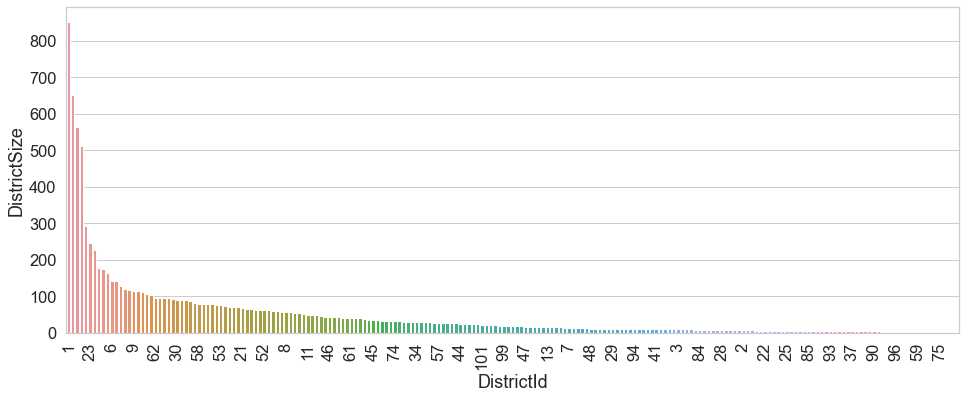

In [85]:
sns.set(style="whitegrid", font_scale=1.5)
f, ax = plt.subplots(figsize=(16, 6))
sns.barplot(y='DistrictSize', x='DistrictId', 
            data=district_size,
            order=district_size.sort_values(by='DistrictSize', ascending=False)['DistrictId']
           );
ax.tick_params(axis='x', rotation=90)
ax.xaxis.set_major_locator(plt.MaxNLocator(50))

In [86]:
districts_popular = district_size.loc[district_size['DistrictSize'] > 100, 'DistrictId'].tolist()

In [87]:
district_size.loc[~district_size['DistrictId'].isin(districts_popular), 'DistrictId'] = 999
district_size = district_size.groupby('DistrictId')['DistrictSize'].agg(
                            DistrictSize='median')
district_size.reset_index(level='DistrictId', inplace=True)
district_size

,DistrictId,DistrictSize
0,999,15
1,1,652
2,11,129
3,21,165
4,23,565
5,27,851
6,30,228
7,34,111
8,44,104
9,45,116


In [88]:
df_train.loc[~df_train['DistrictId'].isin(districts_popular), 'DistrictId'] = 999
df_test.loc[~df_test['DistrictId'].isin(districts_popular), 'DistrictId'] = 999

### Построение новых признаков
DistrictSize - Размер района

In [89]:
df_train = df_train.merge(district_size, on='DistrictId', how='left').set_index(df_train.index)
df_test = df_test.merge(district_size, on='DistrictId', how='left').set_index(df_test.index)

#### PriceOneRoom - Стоимость одной комнаты

In [90]:
df_train['PriceOneRoom'] = df_train['Price'] / df_train['Rooms']

#### PriceOneRoomByDistrict - Стоимость одной комнаты в зависимости от района

In [91]:
price_by_district = df_train.groupby(['DistrictId'], as_index=False)\
                        .agg({'PriceOneRoom':'median'})\
                        .rename(columns={'PriceOneRoom':'PriceOneRoomByDistrict'})

df_train = df_train.merge(price_by_district, on=['DistrictId'], how='left').set_index(df_train.index)
df_test = df_test.merge(price_by_district, on=['DistrictId'], how='left').set_index(df_test.index)

In [92]:
df_train['RoomSquare'] = df_train['LifeSquare'] / df_train['Rooms']
df_test['RoomSquare'] = df_test['LifeSquare'] / df_test['Rooms']

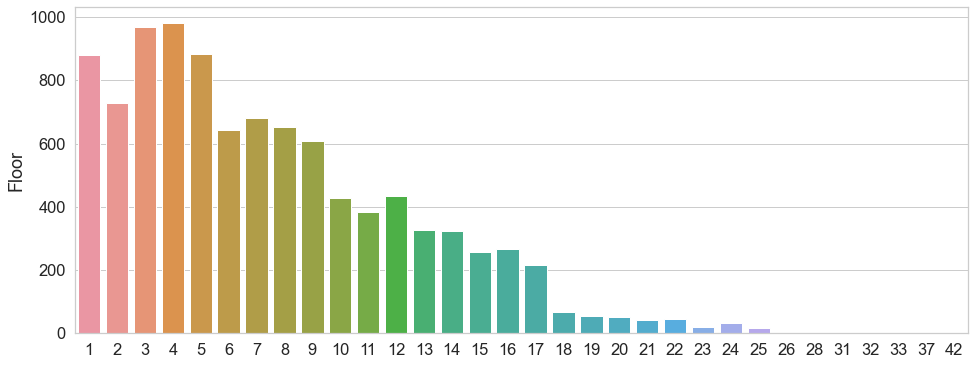

In [93]:
sns.set(style="whitegrid", font_scale=1.5)

f, ax = plt.subplots(figsize=(16, 6))
sns.barplot(y=df_train['Floor'].value_counts(), x=df_train['Floor'].value_counts().index);

In [94]:
df_train.loc[df_train['Floor'] <= 5, 'Floor_cat'] = 1  
df_train.loc[(df_train['Floor'] > 5) & (df_train['Floor'] <= 12), 'Floor_cat'] = 2
df_train.loc[(df_train['Floor'] > 12) & (df_train['Floor'] <= 17), 'Floor_cat'] = 3
df_train.loc[df_train['Floor'] > 17, 'Floor_cat'] = 4

df_test.loc[df_test['Floor'] <= 5, 'Floor_cat'] = 1  
df_test.loc[(df_test['Floor'] > 5) & (df_test['Floor'] <= 12), 'Floor_cat'] = 2
df_test.loc[(df_test['Floor'] > 12) & (df_test['Floor'] <= 17), 'Floor_cat'] = 3
df_test.loc[df_test['Floor'] > 17, 'Floor_cat'] = 4

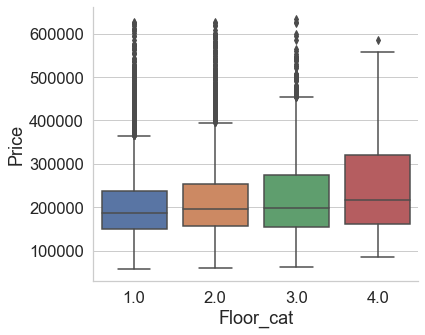

In [95]:
sns.catplot("Floor_cat", "Price", kind="box", data=df_train, aspect=5/4);

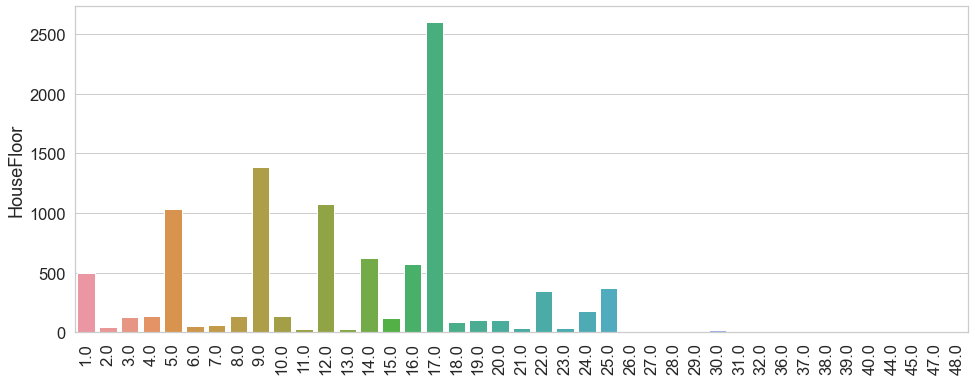

In [96]:
sns.set(style="whitegrid", font_scale=1.5)

f, ax = plt.subplots(figsize=(16, 6))
sns.barplot(y=df_train['HouseFloor'].value_counts(), 
            x=df_train['HouseFloor'].value_counts().index,
           )
ax.tick_params(axis='x', rotation=90);

In [97]:
df_train.loc[df_train['HouseFloor'] <= 5, 'HouseFloor_cat'] = 1  
df_train.loc[(df_train['HouseFloor'] > 5) & (df_train['HouseFloor'] <= 12), 'HouseFloor_cat'] = 2
df_train.loc[(df_train['HouseFloor'] > 12) & (df_train['HouseFloor'] <= 17), 'HouseFloor_cat'] = 3
df_train.loc[df_train['HouseFloor'] > 17, 'HouseFloor_cat'] = 4

df_test.loc[df_test['HouseFloor'] <= 5, 'HouseFloor_cat'] = 1  
df_test.loc[(df_test['HouseFloor'] > 5) & (df_test['HouseFloor'] <= 12), 'HouseFloor_cat'] = 2
df_test.loc[(df_test['HouseFloor'] > 12) & (df_test['HouseFloor'] <= 17), 'HouseFloor_cat'] = 3
df_test.loc[df_test['HouseFloor'] > 17, 'HouseFloor_cat'] = 4

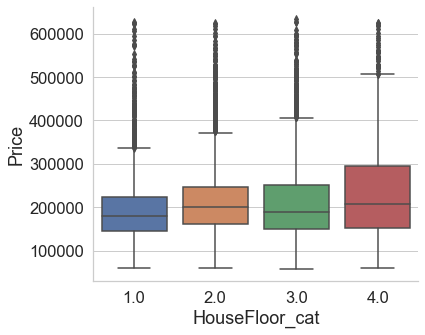

In [98]:
sns.catplot("HouseFloor_cat", "Price", kind="box", data=df_train, aspect=5/4);

In [99]:
df_train[['Floor_cat', 'HouseFloor_cat']] = df_train[['Floor_cat', 'HouseFloor_cat']].astype(int)
df_test[['Floor_cat', 'HouseFloor_cat']] = df_test[['Floor_cat', 'HouseFloor_cat']].astype(int)

df_train['StoreysFloor'] = (df_train['HouseFloor_cat'].astype(str) + \
                            df_train['Floor_cat'].astype(str)).astype(int)
df_test['StoreysFloor'] = (df_test['HouseFloor_cat'].astype(str) + \
                            df_test['Floor_cat'].astype(str)).astype(int)

df_train['StoreysFloor'].value_counts()

32    1854
11    1837
22    1518
21    1366
33    1057
31    1043
42     458
44     338
43     332
41     197
Name: StoreysFloor, dtype: int64

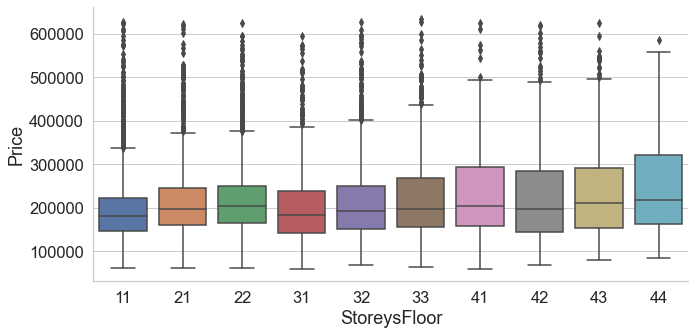

In [100]:
sns.catplot("StoreysFloor", "Price", kind="box", data=df_train, aspect=2/1);

#### PriceOneRoomByStoreysFloor - Стоимость одной комнаты в зависимости от категории StoreysFloor

In [101]:
price_by_floor_storeys = df_train.groupby(['StoreysFloor'], as_index=False)\
                    .agg({'PriceOneRoom':'median'})\
                    .rename(columns={'PriceOneRoom':'PriceOneRoomByStoreysFloor'})

In [102]:
df_train = df_train.merge(price_by_floor_storeys, on=['StoreysFloor'], how='left').set_index(df_train.index)
df_test = df_test.merge(price_by_floor_storeys, on=['StoreysFloor'], how='left').set_index(df_test.index)

## Отбор признаков

In [103]:
target_name = ['Price']
feature_names = [
#             'DistrictId',
             'Rooms',
             'Square',
#             'LifeSquare',
             'KitchenSquare',
             'Floor',
             'HouseFloor',
             'HouseYear',
             'Ecology_1',
#             'Ecology_2',
#             'Ecology_3',
             'Social_1',
             'Social_2',
             'Social_3',
#             'Healthcare_1',
             'Helthcare_2',
             'Shops_1',
#             'Shops_2',
#             'Price',
             'DistrictSize',
#             'PriceOneRoom',
             'PriceOneRoomByDistrict',
             'RoomSquare',
             'Floor_cat',
             'HouseFloor_cat',
#             'StoreysFloor',
#             'PriceOneRoomByStoreysFloor'
]

In [108]:
X = df_train[feature_names]
y = df_train[target_name]
X_test = df_test[feature_names]

AttributeError: 'DataFrame' object has no attribute 'ravel'

In [105]:
forest = RandomForestRegressor(max_depth=19, 
                               max_features=5, 
                               n_estimators=400,
                               random_state=42)

In [106]:
kf = KFold(n_splits=5, random_state=42, shuffle=True)

cv_score = cross_val_score(forest, X, y, scoring='r2', cv=kf)
print('R2: {:.5f}'.format(cv_score.mean()))

C:\Users\glebs\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\glebs\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\glebs\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\glebs\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y wa

R2: 0.74238
